In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [2]:
# Where to save the figures and data files
PROJECT_ROOT_DIR = "/Users/endriasa//Projects/FYS4150/src/Project4/Results/"
FIGURE_ID = "Results/Figures"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", dpi=100,pad_inches=0.0,transparent=False, bbox_inches='tight',format='png')

In [3]:
filename1 = "problem4d_rand_T1_6.txt"    
filename2 = "problem4d_rand_T24_6.txt" 
filename3 = "problem4d_uni_T1_6.txt"    
filename4 = "problem4d_uni_T24_6.txt" 

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4

data1      = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)
data2      = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1)
data3      = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1)
data4      = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1)

axis      = data1[:,2]
eng_rnd1  = data1[:,3]
eng_rnd24 = data2[:,3]
mom_rnd1  = data1[:,4]
mom_rnd24 = data2[:,4]
acc_rnd1  = data1[:,10]/(400*axis)
acc_rnd24 = data2[:,10]/(400*axis)
eng_uni1  = data3[:,3]
eng_uni24 = data4[:,3]
mom_uni1  = data3[:,4]
mom_uni24 = data4[:,4]
acc_uni1  = data3[:,10]/(400*axis)
acc_uni24 = data4[:,10]/(400*axis)

In [ ]:
plt.subplots(figsize = (18, 7))
ax = plt.subplot(1, 2, 1)
plt.semilogx(axis,eng_rnd1,'r',markersize=5,label="Random [T=1.0]",linewidth=3)
plt.semilogx(axis,eng_uni1,'b',markersize=5,label="Ordered [T=1.0]",linewidth=3)
plt.semilogx(axis,eng_rnd24,'k',markersize=5,label="Random [T=2.4]",linewidth=3)
plt.semilogx(axis,eng_uni24,'m',markersize=5,label="Ordered [T=2.4]",linewidth=3)
plt.xlabel("MC cycles",  fontsize = 30)
plt.ylabel(r"$\langle E \rangle$ per spin", fontsize = 30)
plt.legend(loc='upper right', fontsize = 25, frameon=False)
plt.xlim(2,1e6)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.tight_layout()


ax = plt.subplot(1, 2, 2)
plt.semilogx(axis,mom_rnd24,'k',markersize=5,label="Random [T=2.4]",linewidth=3)
plt.semilogx(axis,mom_uni24,'m',markersize=5,label="Ordered [T=2.4]",linewidth=3)
plt.semilogx(axis,mom_rnd1,'r',markersize=5,label="Random [T=1.0]",linewidth=3)
plt.semilogx(axis,mom_uni1,'b',markersize=5,label="Ordered [T=1.0]",linewidth=3)
plt.xlabel("MC cycles",  fontsize = 30)
plt.ylabel(r"$\langle|M|\rangle$ per spin",fontsize = 30)
plt.legend(loc='lower right', fontsize = 25, frameon=False)
plt.xlim(2,1e6)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.tight_layout()
save_fig('Energy_Mom_equilibration')
plt.show()

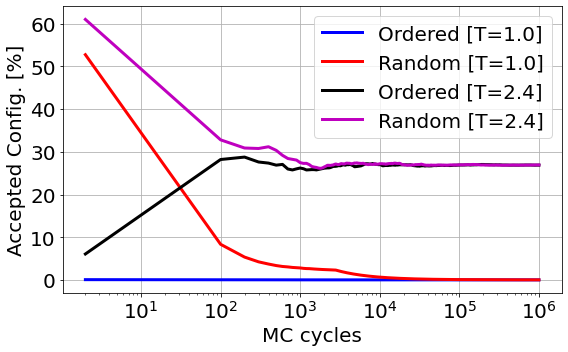

In [4]:
plt.subplots(figsize = (8, 5))
ax = plt.subplot(1, 1, 1)
plt.semilogx(axis,acc_uni1*100,'b',markersize=5,label="Ordered [T=1.0]",linewidth=3)
plt.semilogx(axis,acc_rnd1*100,'r',markersize=5,label="Random [T=1.0]",linewidth=3)
plt.semilogx(axis,acc_uni24*100,'k',markersize=5,label="Ordered [T=2.4]",linewidth=3)
plt.semilogx(axis,acc_rnd24*100,'m',markersize=5,label="Random [T=2.4]",linewidth=3)
plt.xlabel("MC cycles", fontsize = 20)
plt.ylabel("Accepted Config. [%]", fontsize = 20)
plt.legend(loc='lower left', fontsize = 20)
plt.legend(fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
plt.tight_layout()
save_fig('accept_NMC')
plt.show()

In [5]:
filename1  = "problem4d_rand_Tvary_6.txt"    
file_path1 = PROJECT_ROOT_DIR + filename1
data1      = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)
acc_rnd    = data1[:,10]/(400*1e6)
axis       = data1[:,1]

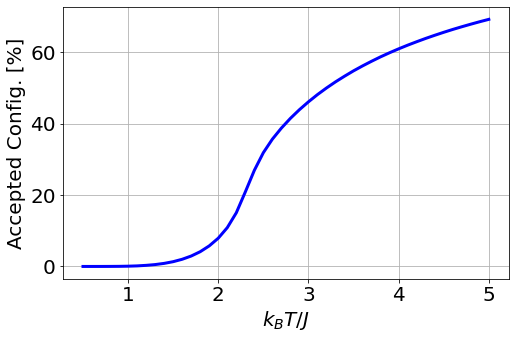

In [6]:
plt.subplots(figsize = (8, 5))
ax = plt.subplot(1, 1, 1)
plt.plot(axis,acc_rnd*100,'b',markersize=5,linewidth=3)
plt.xlabel(r"$k_BT/J$", fontsize = 20)
plt.ylabel("Accepted Config. [%]", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
save_fig('accept_Temp')
plt.show()

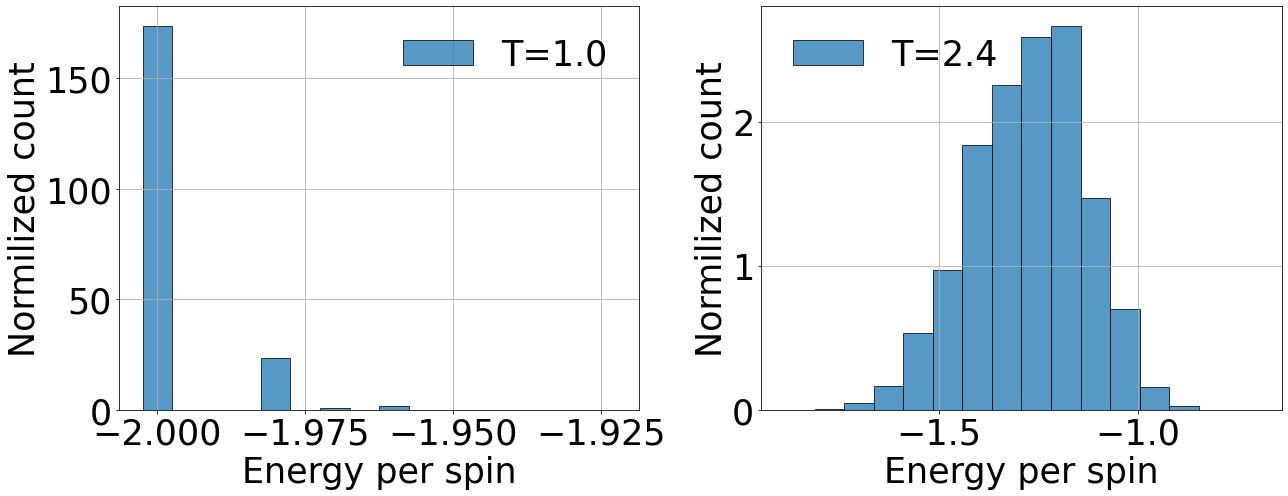

In [8]:
filename1  = "Eenergy_count_T1.txt"    
filename2  = "Eenergy_count_T24.txt"  
file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2

ENERGY_DIST_T1          = np.loadtxt(file_path1, dtype = np.float64, skiprows = 0)
ENERGY_DIST_T24         = np.loadtxt(file_path2, dtype = np.float64, skiprows = 0)
hist_T1, bin_edges_T1   = np.histogram(ENERGY_DIST_T1, bins = 16, density = True)
hist_T24, bin_edges_T24 = np.histogram(ENERGY_DIST_T24, bins = 16, density = True)

plt.subplots(figsize = (18, 7))
ax = plt.subplot(1, 2, 1)
ax.bar(bin_edges_T1[:-1], hist_T1, width = np.diff(bin_edges_T1)[0], align = "center", 
       edgecolor = "k", alpha = 0.75,label='T=1.0')
ax.set_xlabel("Energy per spin", fontsize = 35)
ax.set_ylabel("Normilized count", fontsize = 35)
plt.tick_params(axis='both', which='major', labelsize=35)
#ax.set_yscale('log')
plt.legend(loc='best', fontsize = 35, frameon=False)
ax.grid()
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
ax.bar(bin_edges_T24[:-1], hist_T24, width = np.diff(bin_edges_T24)[0], align = "center", 
       edgecolor = "k", alpha = 0.75,label='T=2.4')
ax.set_xlabel("Energy per spin", fontsize = 35)
ax.set_ylabel("Normilized count", fontsize = 35)
plt.tick_params(axis='both', which='major', labelsize=35)
#ax.set_yscale('log')
plt.legend(loc='best', fontsize = 35, frameon=False)
ax.grid()
plt.tight_layout()
save_fig('energy_dist')
plt.show()

In [ ]:
filename1  = "problem4f_rand_20_6.txt"    
filename2  = "problem4f_rand_40_6.txt"
filename3  = "problem4f_rand_60_6.txt"
filename4  = "problem4f_rand_80_6.txt"
filename5  = "problem4f_rand_100_6.txt"

file_path1 = PROJECT_ROOT_DIR + filename1
file_path2 = PROJECT_ROOT_DIR + filename2
file_path3 = PROJECT_ROOT_DIR + filename3
file_path4 = PROJECT_ROOT_DIR + filename4
file_path5 = PROJECT_ROOT_DIR + filename5

data1 = np.loadtxt(file_path1, dtype = np.float64, skiprows = 1)
data2 = np.loadtxt(file_path2, dtype = np.float64, skiprows = 1)
data3 = np.loadtxt(file_path3, dtype = np.float64, skiprows = 1)
data4 = np.loadtxt(file_path4, dtype = np.float64, skiprows = 1)
data5 = np.loadtxt(file_path5, dtype = np.float64, skiprows = 1)

axis    = data1[:,1]
eng_20  = data1[:,3]
eng_40  = data2[:,3]
eng_60  = data3[:,3]
eng_80  = data4[:,3]
eng_100 = data5[:,3]
mag_20  = data1[:,4]
mag_40  = data2[:,4]
mag_60  = data3[:,4]
mag_80  = data4[:,4]
mag_100 = data5[:,4]
cv_20   = data1[:,8]
cv_40   = data2[:,8]
cv_60   = data3[:,8]
cv_80   = data4[:,8]
cv_100  = data5[:,8]
cai_20  = data1[:,9]
cai_40  = data2[:,9]
cai_60  = data3[:,9]
cai_80  = data4[:,9]
cai_100 = data5[:,9]

In [ ]:
plt.subplots(figsize = (8, 5))
ax = plt.subplot(1, 1, 1)
plt.plot(axis,eng_20,'bo-',markersize=5,linewidth=3,label=r"$20\times20$")
plt.plot(axis,eng_40,'ro-',markersize=5,linewidth=3,label=r"$40\times40$")
plt.plot(axis,eng_60,'ko-',markersize=5,linewidth=3,label=r"$60\times60$")
plt.plot(axis,eng_80,'go-',markersize=5,linewidth=3,label=r"$80\times80$")
plt.plot(axis,eng_100,'mo-',markersize=5,linewidth=3,label=r"$100\times100$")
plt.legend(loc='best', fontsize = 20, frameon=False)
plt.xlabel(r"$k_BT/J$",  fontsize = 20)
plt.ylabel(r"$\langle E \rangle$ per spin", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
save_fig('Energy_sptr')
plt.show()

In [ ]:
plt.subplots(figsize = (8, 5))
ax = plt.subplot(1, 1, 1)
plt.plot(axis,mag_20,'bo-',markersize=5,linewidth=3,label=r"$20\times20$")
plt.plot(axis,mag_40,'ro-',markersize=5,linewidth=3,label=r"$40\times40$")
plt.plot(axis,mag_60,'ko-',markersize=5,linewidth=3,label=r"$60\times60$")
plt.plot(axis,mag_80,'go-',markersize=5,linewidth=3,label=r"$80\times80$")
plt.plot(axis,mag_100,'mo-',markersize=5,linewidth=3,label=r"$100\times100$")
plt.legend(loc='best', fontsize = 20, frameon=False)
plt.xlabel(r"$k_BT/J$", fontsize = 20)
plt.ylabel(r"$\langle |M| \rangle$ per spin", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
save_fig('Mom_sptr')
plt.show()

In [ ]:
plt.subplots(figsize = (8, 5))
ax = plt.subplot(1, 1, 1)
plt.plot(axis,cv_20,'bo-',markersize=5,linewidth=3,label=r"$20\times20$")
plt.plot(axis,cv_40,'ro-',markersize=5,linewidth=3,label=r"$40\times40$")
plt.plot(axis,cv_60,'ko-',markersize=5,linewidth=3,label=r"$60\times60$")
plt.plot(axis,cv_80,'go-',markersize=5,linewidth=3,label=r"$80\times80$")
plt.plot(axis,cv_100,'mo-',markersize=5,linewidth=3,label=r"$100\times100$")
plt.legend(loc='best', fontsize = 20, frameon=False)
plt.xlabel(r"$k_BT/J$",  fontsize = 20)
plt.ylabel(r"$C_v$ per spin", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
save_fig('Cv_sptr')
plt.show()

In [ ]:
plt.subplots(figsize = (8, 5))
ax = plt.subplot(1, 1, 1)
plt.plot(axis,cai_20,'bo-',markersize=5,linewidth=3,label=r"$20\times20$")
plt.plot(axis,cai_40,'ro-',markersize=5,linewidth=3,label=r"$40\times40$")
plt.plot(axis,cai_60,'ko-',markersize=5,linewidth=3,label=r"$60\times60$")
plt.plot(axis,cai_80,'go-',markersize=5,linewidth=3,label=r"$80\times80$")
plt.plot(axis,cai_100,'mo-',markersize=5,linewidth=3,label=r"$100\times100$")
plt.legend(loc='best', fontsize = 20, frameon=False)
plt.xlabel(r"$k_BT/J$",  fontsize = 20)
plt.ylabel(r"$\chi$ per spin",  fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
save_fig('Chi_sptr')
plt.show()

In [ ]:
in100 = np.where(cai_100 == np.max(cai_100))
in80  = np.where(cai_80 == np.max(cai_80))
in60  = np.where(cai_60 == np.max(cai_60))
in40  = np.where(cai_40 == np.max(cai_40))
in20  = np.where(cai_20 == np.max(cai_20))

T100 = axis[in100]
T80  = axis[in80]
T60  = axis[in60]
T40  = axis[in40]
T20  = axis[in20]

x  = 1/np.array([20, 40, 60, 80, 100])
xx = np.array([0,1/20,1/40,1/60,1/80,1/100])
y  = np.array([T20, T40, T60, T80, T100])

In [ ]:
linreg = LinearRegression(fit_intercept=True)
poly   = PolynomialFeatures(degree=1)
X      = poly.fit_transform(x[:,np.newaxis])
XX     = poly.fit_transform(xx[:,np.newaxis])

linreg.fit(X, y.reshape(-1, 1))
ypredict = linreg.predict(XX)

In [ ]:
ols = sm.OLS(y, X)
ols_result = ols.fit()
print_model = ols_result.summary()
print(print_model)

In [ ]:
plt.subplots(figsize = (8, 5))
ax = plt.subplot(1, 1, 1)
plt.plot(xx,ypredict,'b',markersize=5,linewidth=3,label=r"Linear fit")
plt.plot(x,y,'ro',markersize=5,linewidth=3,label=r"Data")
plt.legend(loc='best', fontsize = 20, frameon=False)
plt.xlabel(r"$L^{-1}$", fontname = "serif", fontsize = 20)
plt.ylabel(r"$T_c(L)$", fontname = "serif", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
save_fig('Chi_Tc')
plt.show()